In [3]:
# the genetic algorithm to solve string matching

import random

POPULATION_SIZE = 50
GENOME_LENGTH = 20
MUTATION_RATE = 0.01
NUM_GENERATIONS = 100

target_string = "CACCGTIUA"
genes="AACCGTTUAA"

def fitness(individual):
    score = sum(1 for a, b in zip(individual, target_string) if a == b)
    return score

class Individual:
    def _init_(self,genes) -> None:
        self.chromosome=genes
        self.fitness=fitness(genes)


def Initialize_pop():
    population = []
    for _ in range(POPULATION_SIZE):
        individual = ''.join(random.choice('AAACCTTTAAGGGAAACCTTTTAAACCTTTAAGGGAAACCTTTT') for _ in range(GENOME_LENGTH))
        population.append(individual)
    return population


def mutate(individual):
    mutated_individual = ""
    for char in individual:
        if random.random() < MUTATION_RATE:
            mutated_individual += random.choice('AAACCTTTAAGGGAAACCTTTTAAACCTTTAAGGGAAACCTTTT')
        else:
            mutated_individual += char
    return mutated_individual


def crossover(parent1, parent2):
    crossover_point = random.randint(1, GENOME_LENGTH - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2


def select_parents(population):
    tournament_size = 5
    parents = []
    for _ in range(2):
        tournament = random.sample(population, tournament_size)
        best_individual = max(tournament, key=fitness)
        parents.append(best_individual)
    return parents

 
def create_new_generation(population):
    new_generation = []
    while len(new_generation) < POPULATION_SIZE:
        parent1, parent2 = select_parents(population)
        child1, child2 = crossover(parent1, parent2)
        child1 = mutate(child1)
        child2 = mutate(child2)
        new_generation.extend([child1, child2])
    return new_generation

def genetic_algorithm():
    population = Initialize_pop()
    for generation in range(NUM_GENERATIONS):
        population = sorted(population, key=fitness, reverse=True)
        best_individual = population[0]
        print(f"Generation {generation+1}, Best Fitness: {fitness(best_individual)}")
        population = create_new_generation(population)

    best_individual = max(population, key=fitness)
    print("Genetic Algorithm finished.")
    print("Best individual:", best_individual)
    print("Best fitness:", fitness(best_individual))


genetic_algorithm()

Generation 1, Best Fitness: 4
Generation 2, Best Fitness: 4
Generation 3, Best Fitness: 5
Generation 4, Best Fitness: 6
Generation 5, Best Fitness: 6
Generation 6, Best Fitness: 7
Generation 7, Best Fitness: 7
Generation 8, Best Fitness: 7
Generation 9, Best Fitness: 7
Generation 10, Best Fitness: 7
Generation 11, Best Fitness: 7
Generation 12, Best Fitness: 7
Generation 13, Best Fitness: 7
Generation 14, Best Fitness: 7
Generation 15, Best Fitness: 7
Generation 16, Best Fitness: 7
Generation 17, Best Fitness: 7
Generation 18, Best Fitness: 7
Generation 19, Best Fitness: 7
Generation 20, Best Fitness: 7
Generation 21, Best Fitness: 7
Generation 22, Best Fitness: 7
Generation 23, Best Fitness: 7
Generation 24, Best Fitness: 7
Generation 25, Best Fitness: 7
Generation 26, Best Fitness: 7
Generation 27, Best Fitness: 7
Generation 28, Best Fitness: 7
Generation 29, Best Fitness: 7
Generation 30, Best Fitness: 7
Generation 31, Best Fitness: 7
Generation 32, Best Fitness: 7
Generation 33, Be

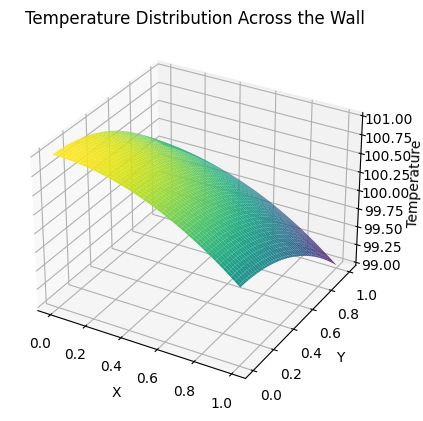

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


K = 0.5  
L = 1.0  
G = 1.0  
Tw = 100.0 


n_points = 100
x_vals = np.linspace(0, L, n_points)
y_vals = np.linspace(0, L, n_points)


x, y = np.meshgrid(x_vals, y_vals)


T = (G / (2 * K) * (L**2 - x**2 - y**2)) + Tw


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, T, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Temperature')
ax.set_title('Temperature Distribution Across the Wall')

plt.show()

In [5]:
def calculate_probability():
    dice_outcomes = range(1, 7)  

    favorable_outcomes = 0 

    total_outcomes = 0  

    for outcome1 in dice_outcomes:
        for outcome2 in dice_outcomes:
            for outcome3 in dice_outcomes:
                product = (outcome1 * outcome2 * outcome3) / 2  
                dice_sum = outcome1 + outcome2 + outcome3 

                if product > dice_sum:
                    favorable_outcomes += 1

                total_outcomes += 1

    probability = favorable_outcomes / total_outcomes
    return probability


calculate_probability()


0.6296296296296297